# The correlation coefficient is the regression slope of the standardized vectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def standardize(arr):
    arr = arr - arr.mean()
    return arr / np.std(arr)

In [4]:
standardize(np.arange(10))

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

In [5]:
vec_len = 100
means = np.arange(0, 10)
deviations = np.arange(1, 11)
vecs = []
for mean in means:
    for deviation in deviations:
        vec = np.random.normal(mean, deviation, size=(vec_len,))
        vecs.append(vec)

In [6]:
def fit_lstsq_line(x, y):
    X = np.ones((len(x), 2))
    X[:, 0] = x
    betas = np.linalg.pinv(X).dot(y)
    return betas

In [7]:
def slopes_for_vecs(vecs):
    slopes = []
    intercepts = []
    for x in vecs:
        for y in vecs:
            if x is y:
                continue
            slope, intercept = fit_lstsq_line(x, y)
            slopes.append(slope)
            intercepts.append(intercept)
    return slopes, intercepts

slopes, intercepts = slopes_for_vecs(vecs)
print(min(slopes), max(slopes))
print(min(intercepts), max(intercepts))

(-2.0382527105744805, 2.912103236301943)
(-13.238230361848579, 23.449632605483853)


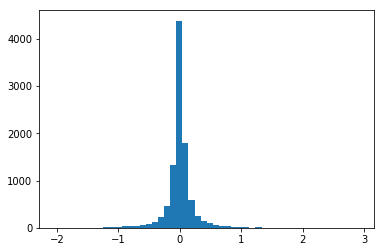

In [8]:
plt.hist(slopes, bins=50);

Now standarize the vectors (subtract mean, divide by standard deviation):

In [9]:
z_vecs = [standardize(vec) for vec in vecs]

Recalculate the least-squares line for the standardized vectors.  Now the slopes are within -1 and 1, and the intercepts are all very very close to 0 (in fact, within floating point error, they are 0).

In [10]:
z_slopes, z_intercepts = slopes_for_vecs(z_vecs)
print(min(z_slopes), max(z_slopes))
print(min(z_intercepts), max(z_intercepts))

(-0.35142199179036204, 0.37855638466493929)
(-1.0772632785815972e-15, 1.0026701691145945e-15)


The slopes of the standardized lines are the same as the correlation coefficients of the two vectors (where the vectors are *not* standarized):

In [11]:
rs = []
for x in vecs:
    for y in vecs:
        if x is y:
            continue
        rs.append(np.corrcoef(x, y)[0, 1])

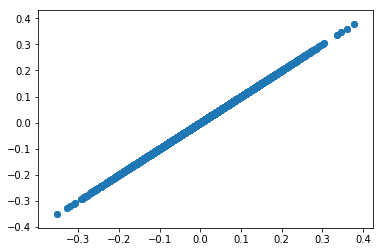

In [12]:
plt.scatter(rs, z_slopes)

In [13]:
np.allclose(rs, z_slopes)

True